In [243]:
import pandas as pd

У нас есть датасет с характеристиками мобильных телефонов в котором 15 столбцов:
1. Производитель
2. Модель
3. Вес устройства
4. Объем оперативной памяти
5. Разрешение фронтальной камеры
6. Разрешение основной камеры
7. Емкость батареи
8. Диагональ экрана
9. Цена в Пакистане
10. Цена в Индии
11. Цена в Китае
12. Цена в США
13. Цена в Дубае
14. Год выпуска
15. Процессор
Попробуем кластеризовать данные и поискать в них аномалии


In [244]:
df=pd.read_csv("Mobiles Dataset (2025).csv", encoding='latin-1')
df.head()

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (Pakistan),Launched Price (India),Launched Price (China),Launched Price (USA),Launched Price (Dubai),Launched Year
0,Apple,iPhone 16 128GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 224,999","INR 79,999","CNY 5,799",USD 799,"AED 2,799",2024
1,Apple,iPhone 16 256GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 234,999","INR 84,999","CNY 6,099",USD 849,"AED 2,999",2024
2,Apple,iPhone 16 512GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 244,999","INR 89,999","CNY 6,499",USD 899,"AED 3,199",2024
3,Apple,iPhone 16 Plus 128GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 249,999","INR 89,999","CNY 6,199",USD 899,"AED 3,199",2024
4,Apple,iPhone 16 Plus 256GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 259,999","INR 94,999","CNY 6,499",USD 949,"AED 3,399",2024


In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930 entries, 0 to 929
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Company Name               930 non-null    object
 1   Model Name                 930 non-null    object
 2   Mobile Weight              930 non-null    object
 3   RAM                        930 non-null    object
 4   Front Camera               930 non-null    object
 5   Back Camera                930 non-null    object
 6   Processor                  930 non-null    object
 7   Battery Capacity           930 non-null    object
 8   Screen Size                930 non-null    object
 9   Launched Price (Pakistan)  930 non-null    object
 10  Launched Price (India)     930 non-null    object
 11  Launched Price (China)     930 non-null    object
 12  Launched Price (USA)       930 non-null    object
 13  Launched Price (Dubai)     930 non-null    object
 14  Launched Y

In [246]:
df.duplicated().sum()

np.int64(15)

In [247]:
"""
в данных видим дубли, надо их удалить.
Так же, видим перед ценой указан код валюты, его надо будет удалить, в размере экрана надо удалить "inches", в камерах "MP" и тд... ну и для упрощения оставлю только цену в США
"""
df=df.drop_duplicates()

In [248]:
# Заменяем на пусто все коды валюты
df['Price_USD'] = df['Launched Price (USA)'].str.replace('USD ', '').str.replace(',', '')

# заменяем дюймы на пусто и меняем тип данных
df['Screen Size'] = df['Screen Size'].astype(str).str.extract(r'(\d+\.?\d*)')[0].astype(float)

# есть в датасете телефоны с разным объемом памяти, оставим только больший
df['RAM'] = df['RAM'].str.replace('GB', '').apply(lambda x: max([float(i.strip()) for i in str(x).split('/')]) if '/' in str(x) else float(x))

# делаем всё то же самое с емкостью батареи
df['Battery Capacity'] = df['Battery Capacity'].str.replace('mAh', '').str.replace(',', '').astype(float)

# и с камерами
df['Front Camera'] = df['Front Camera'].str.replace('MP', '').str.replace('UDC', '')
df['Front Camera'] = df['Front Camera'].apply(lambda x: sum([float(i.strip()) for i in str(x).split(',') if i.strip().replace('.','').isdigit()]))

# и еще раз камеру, но уже основную
df['Back Camera'] = df['Back Camera'].str.replace('MP', '')
df['Back Camera'] = df['Back Camera'].apply(lambda x: sum([float(i.strip()) for i in str(x).split(',') if i.strip().replace('.','').isdigit()]))

# и вес
df['Mobile Weight'] = df['Mobile Weight'].str.replace('g', '').astype(float)

# Удаляем столбцы с ценами
df.drop(['Launched Price (Pakistan)', 'Launched Price (India)', 'Launched Price (China)',
         'Launched Price (USA)', 'Launched Price (Dubai)'], axis=1, inplace=True)
df.head()

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Year,Price_USD
0,Apple,iPhone 16 128GB,174.0,6.0,12.0,48.0,A17 Bionic,3600.0,6.1,2024,799
1,Apple,iPhone 16 256GB,174.0,6.0,12.0,48.0,A17 Bionic,3600.0,6.1,2024,849
2,Apple,iPhone 16 512GB,174.0,6.0,12.0,48.0,A17 Bionic,3600.0,6.1,2024,899
3,Apple,iPhone 16 Plus 128GB,203.0,6.0,12.0,48.0,A17 Bionic,4200.0,6.7,2024,899
4,Apple,iPhone 16 Plus 256GB,203.0,6.0,12.0,48.0,A17 Bionic,4200.0,6.7,2024,949


In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 915 entries, 0 to 929
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company Name      915 non-null    object 
 1   Model Name        915 non-null    object 
 2   Mobile Weight     915 non-null    float64
 3   RAM               915 non-null    float64
 4   Front Camera      915 non-null    float64
 5   Back Camera       915 non-null    float64
 6   Processor         915 non-null    object 
 7   Battery Capacity  915 non-null    float64
 8   Screen Size       915 non-null    float64
 9   Launched Year     915 non-null    int64  
 10  Price_USD         915 non-null    object 
dtypes: float64(6), int64(1), object(4)
memory usage: 85.8+ KB


In [223]:
df['Price_USD'] = pd.to_numeric(df['Price_USD'], errors='coerce')
df.info()
#осталось только 3 не числовых поля

<class 'pandas.core.frame.DataFrame'>
Index: 915 entries, 0 to 929
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company Name      915 non-null    object 
 1   Model Name        915 non-null    object 
 2   Mobile Weight     915 non-null    float64
 3   RAM               915 non-null    float64
 4   Front Camera      915 non-null    float64
 5   Back Camera       915 non-null    float64
 6   Processor         915 non-null    object 
 7   Battery Capacity  915 non-null    float64
 8   Screen Size       915 non-null    float64
 9   Launched Year     915 non-null    int64  
 10  Price_USD         915 non-null    float64
dtypes: float64(7), int64(1), object(3)
memory usage: 85.8+ KB


In [255]:
# визуализации
import matplotlib.pyplot as plt
import seaborn as sbn

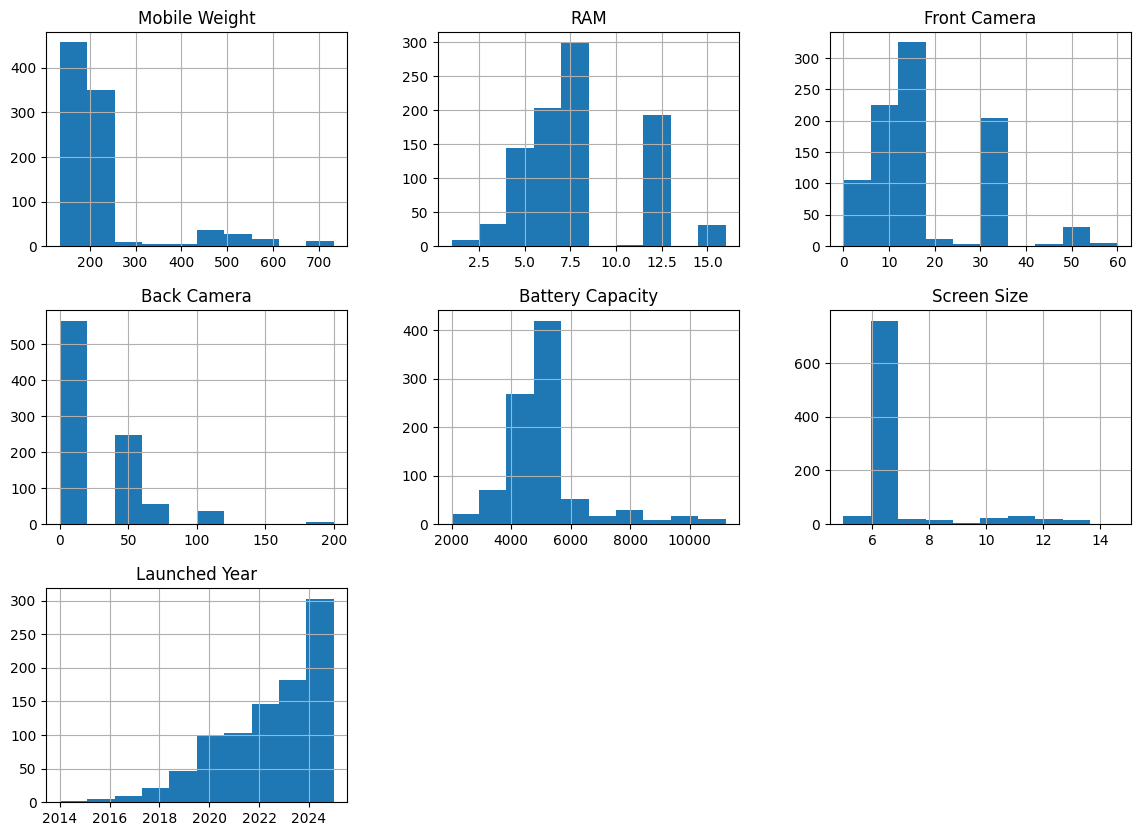

In [256]:
df.hist(figsize=(14,10))
plt.show()

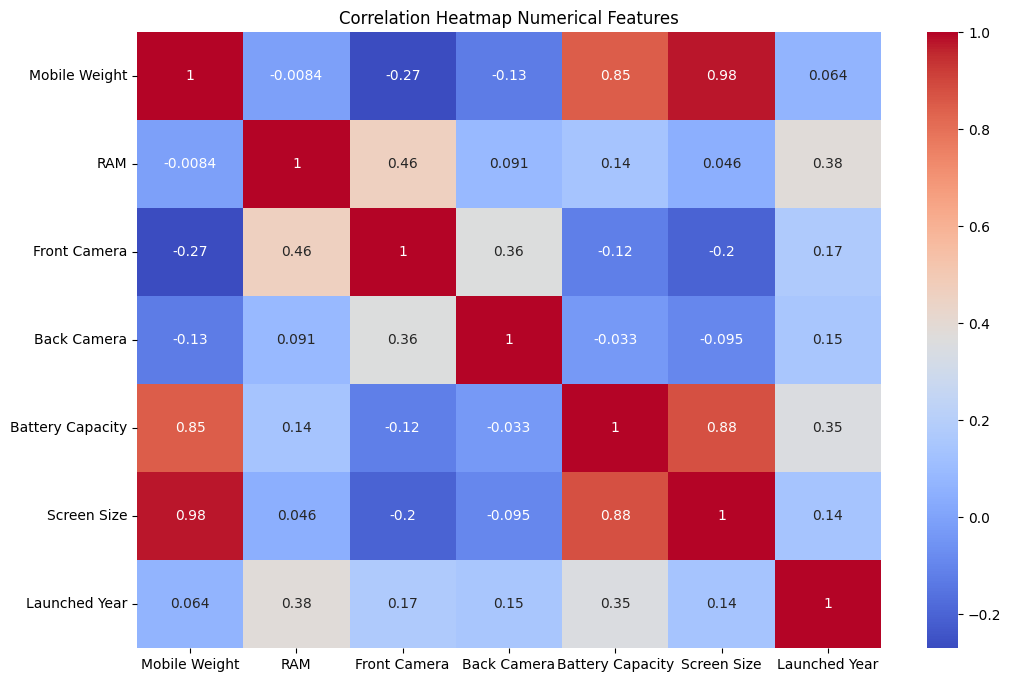

In [258]:
#Видим что есть признаки, которые явно сильно зависимы друг от друга, размер экрана, вес и емкость батареи очень сильно зависят друг от друга, что в целом и логично
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap Numerical Features")
plt.show()

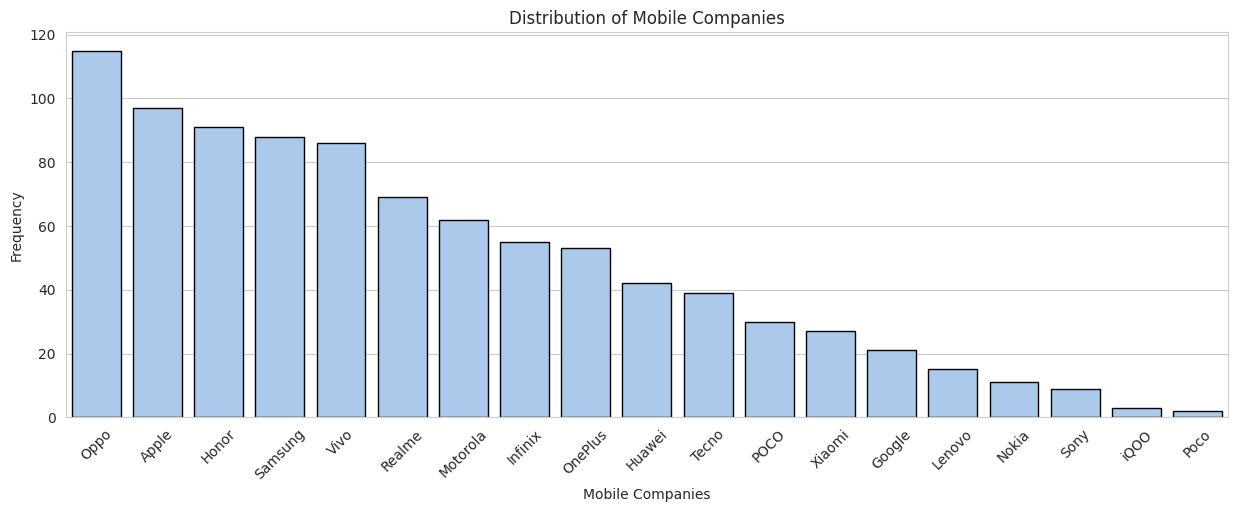

In [266]:
plt.figure(figsize=(15, 5))

sns.countplot(x='Company Name', data=df, order=df['Company Name'].value_counts().index, edgecolor='black')

plt.xticks(rotation=45)
plt.xlabel('Mobile Companies')
plt.ylabel('Frequency')
plt.title('Distribution of Mobile Companies')

plt.show()

In [224]:
# преобразуем  в категориальные признаки текстовые данные
from sklearn.preprocessing import LabelEncoder
encoder  = LabelEncoder()
for i in ['Company Name', 'Model Name', 'Processor']:
    df[i] = encoder.fit_transform(df[i])

In [225]:
df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 915 entries, 0 to 929
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company Name      915 non-null    int64  
 1   Model Name        915 non-null    int64  
 2   Mobile Weight     915 non-null    float64
 3   RAM               915 non-null    float64
 4   Front Camera      915 non-null    float64
 5   Back Camera       915 non-null    float64
 6   Processor         915 non-null    int64  
 7   Battery Capacity  915 non-null    float64
 8   Screen Size       915 non-null    float64
 9   Launched Year     915 non-null    int64  
 10  Price_USD         915 non-null    float64
dtypes: float64(7), int64(4)
memory usage: 85.8 KB


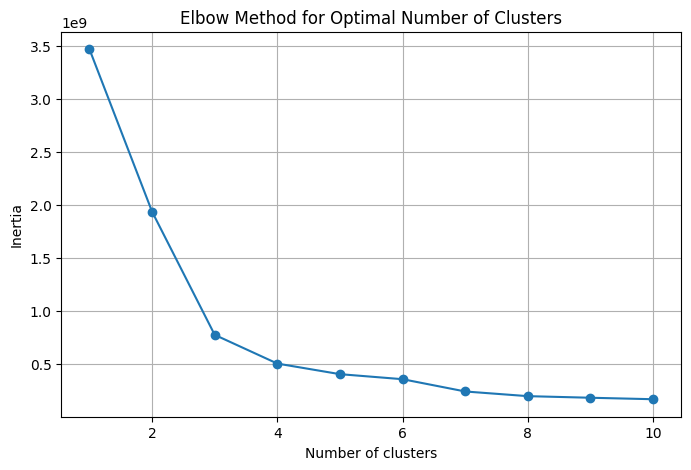

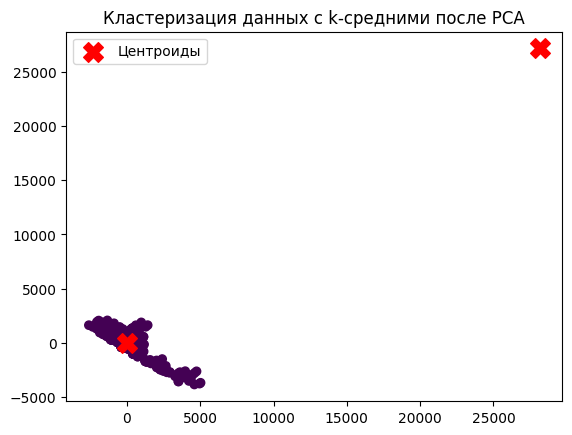

Силуэтовская оценка: 0.96
Индекс Дэвиса-Болдуина: 0.03
Индекс Калински-Харабаса: 722.84


In [226]:
#будем кластеризировать
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA


X = df  # Исходные данные

# Метод локтя (Elbow Method) для выбора оптимального количества кластеров
inertia_scores = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia_scores.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.grid(True)
plt.show()

# Выбор количества кластеров (k) на основе метода локтя
k = 2

# Кластеризация с использованием k-средних
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(X)


# Снижение размерности с использованием PCA для визуализации
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Преобразование центров кластеров с использованием PCA
centroids_pca = pca.transform(kmeans.cluster_centers_)

# Визуализация кластеров после снижения размерности
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=200, c='red', label='Центроиды', marker='X')
plt.title('Кластеризация данных с k-средними после PCA')
plt.legend()
plt.show()

# Вычисление метрик качества
silhouette_avg = silhouette_score(X, labels)
davies_bouldin = davies_bouldin_score(X, labels)
calinski_harabasz = calinski_harabasz_score(X, labels)

print(f"Силуэтовская оценка: {silhouette_avg:.2f}")
print(f"Индекс Дэвиса-Болдуина: {davies_bouldin:.2f}")
print(f"Индекс Калински-Харабаса: {calinski_harabasz:.2f}")


In [227]:
# что за непонятный класс такой.... за то показатели шикарные)
df1 = df
df1['cluster'] = kmeans.fit_predict(df)
df.head()

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Year,Price_USD,cluster
0,0,884,174.0,6.0,12.0,48.0,7,3600.0,6.1,2024,799.0,0
1,0,885,174.0,6.0,12.0,48.0,7,3600.0,6.1,2024,849.0,0
2,0,886,174.0,6.0,12.0,48.0,7,3600.0,6.1,2024,899.0,0
3,0,887,203.0,6.0,12.0,48.0,7,4200.0,6.7,2024,899.0,0
4,0,888,203.0,6.0,12.0,48.0,7,4200.0,6.7,2024,949.0,0


In [228]:
# ааа, это же наша Нокиа за неадекватные деньги, её точно надо удалить как выброс
df2 = df1[df1['cluster'] == 1]
print(df2)


     Company Name  Model Name  Mobile Weight  RAM  Front Camera  Back Camera  \
685             7         672          466.0  4.0           8.0          8.0   

     Processor  Battery Capacity  Screen Size  Launched Year  Price_USD  \
685        212            8200.0         10.4           2022    39622.0   

     cluster  
685        1  


In [229]:
df3 = df[df['Model Name'] != 672]
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 914 entries, 0 to 929
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company Name      914 non-null    int64  
 1   Model Name        914 non-null    int64  
 2   Mobile Weight     914 non-null    float64
 3   RAM               914 non-null    float64
 4   Front Camera      914 non-null    float64
 5   Back Camera       914 non-null    float64
 6   Processor         914 non-null    int64  
 7   Battery Capacity  914 non-null    float64
 8   Screen Size       914 non-null    float64
 9   Launched Year     914 non-null    int64  
 10  Price_USD         914 non-null    float64
 11  cluster           914 non-null    int32  
dtypes: float64(7), int32(1), int64(4)
memory usage: 89.3 KB


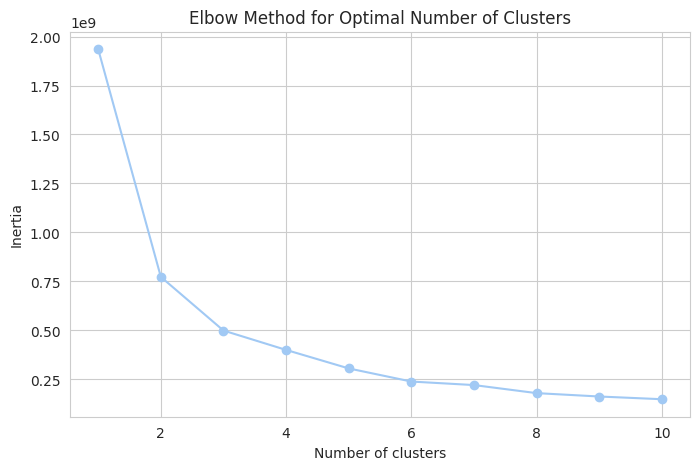

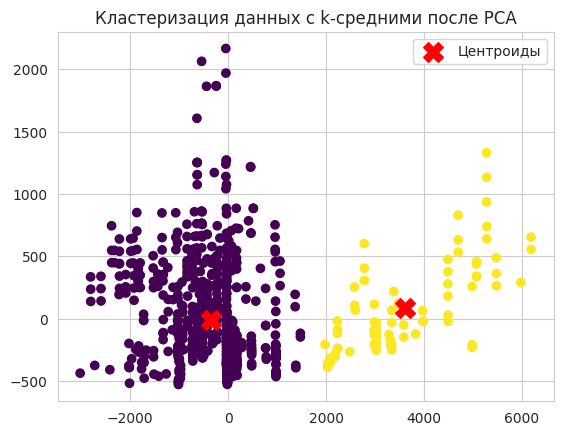

Силуэтовская оценка: 0.72
Индекс Дэвиса-Болдуина: 0.47
Индекс Калински-Харабаса: 1370.05


In [276]:
#заново сегментируем данные, поигрался с количеством классов, идеально - 2, при 6-и классах метрики падают
X1 = df3  # Исходные данные

# Метод локтя (Elbow Method) для выбора оптимального количества кластеров
inertia_scores = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X1)
    inertia_scores.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.grid(True)
plt.show()

# Выбор количества кластеров (k) на основе метода локтя
k = 2

# Кластеризация с использованием k-средних
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(X1)


# Снижение размерности с использованием PCA для визуализации
pca = PCA(n_components=2)
X1_pca = pca.fit_transform(X1)

# Преобразование центров кластеров с использованием PCA
centroids_pca = pca.transform(kmeans.cluster_centers_)

# Визуализация кластеров после снижения размерности
plt.scatter(X1_pca[:, 0], X1_pca[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=200, c='red', label='Центроиды', marker='X')
plt.title('Кластеризация данных с k-средними после PCA')
plt.legend()
plt.show()

# Вычисление метрик качества
silhouette_avg = silhouette_score(X1, labels)
davies_bouldin = davies_bouldin_score(X1, labels)
calinski_harabasz = calinski_harabasz_score(X1, labels)

print(f"Силуэтовская оценка: {silhouette_avg:.2f}")
print(f"Индекс Дэвиса-Болдуина: {davies_bouldin:.2f}")
print(f"Индекс Калински-Харабаса: {calinski_harabasz:.2f}")


In [162]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN,  OPTICS
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import RandomForestClassifier

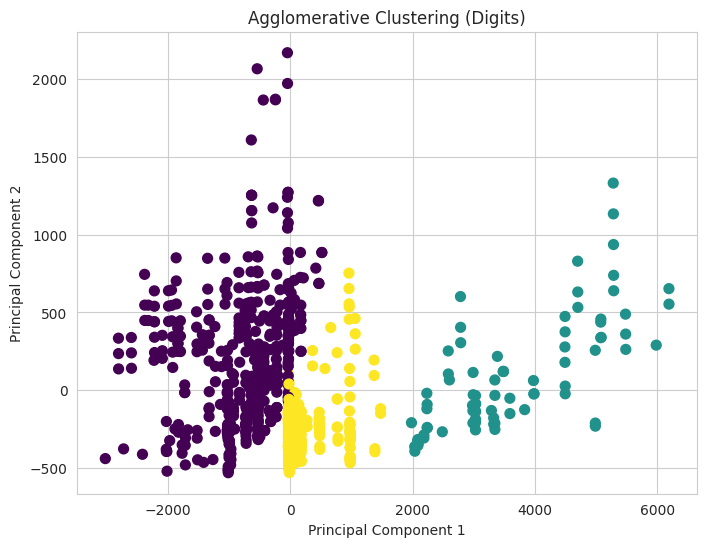

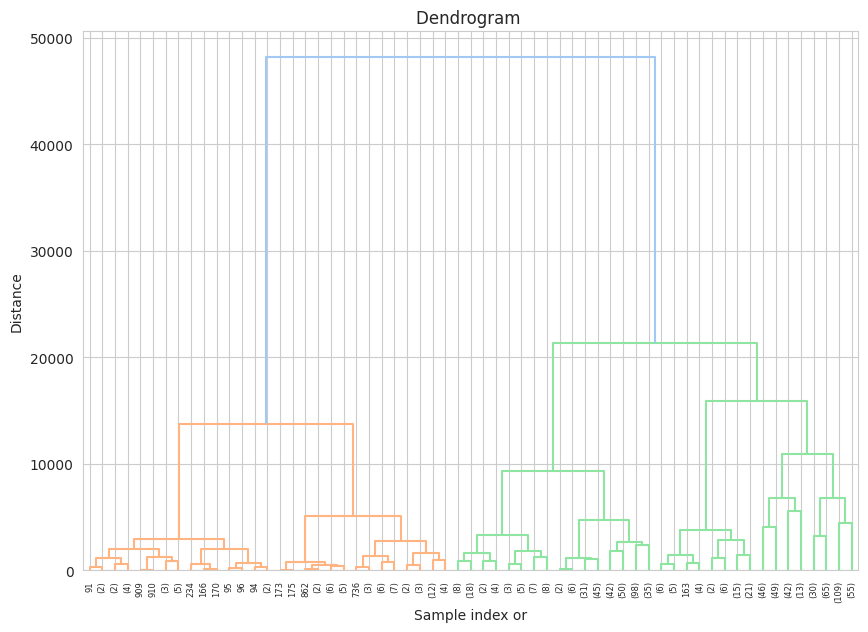

Силуэтовская оценка: 0.34
Индекс Дэвиса-Болдуина: 0.88
Индекс Калински-Харабаса: 1162.59


In [277]:
# Применение Агломеративной кластеризации

n_clusters = 3  # Устанавливаем количество кластеров
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
predicted_labels = agg_clustering.fit_predict(X1)

# Снижение размерности с использованием PCA для визуализации
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X1)

# Визуализация кластеров после агломеративной кластеризации
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=predicted_labels, s=50, cmap='viridis')
plt.title("Agglomerative Clustering (Digits)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# Визуализация дендрограммы
plt.figure(figsize=(10, 7))
Z = linkage(X1, method='ward') # метод Уорда
dendrogram(Z, truncate_mode='level', p=5)
plt.title('Dendrogram ')
plt.xlabel('Sample index or')
plt.ylabel('Distance')
plt.show()

# Вычисление метрик качества
silhouette_avg = silhouette_score(X1, predicted_labels)
davies_bouldin = davies_bouldin_score(X1, predicted_labels)
calinski_harabasz = calinski_harabasz_score(X1, predicted_labels)

print(f"Силуэтовская оценка: {silhouette_avg:.2f}")
print(f"Индекс Дэвиса-Болдуина: {davies_bouldin:.2f}")
print(f"Индекс Калински-Харабаса: {calinski_harabasz:.2f}")

In [273]:
# Применение DBSCAN (Пространственная кластеризация на основе плотности)


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X1)

# Применение DBSCAN (Пространственная кластеризация на основе плотности)
dbscan = DBSCAN(eps=0.2, min_samples=3) #
predictedDB_labels = dbscan.fit_predict(X_scaled)

silhouette_avg = silhouette_score(X1, predictedDB_labels)
davies_bouldin = davies_bouldin_score(X1, predictedDB_labels)
calinski_harabasz = calinski_harabasz_score(X1, predictedDB_labels)


print(f"Силуэтовская оценка: {silhouette_avg:.2f}")
print(f"Индекс Дэвиса-Болдуина: {davies_bouldin:.2f}")
print(f"Индекс Калински-Харабаса: {calinski_harabasz:.2f}")

Силуэтовская оценка: -0.60
Индекс Дэвиса-Болдуина: 2.21
Индекс Калински-Харабаса: 0.88


In [165]:
!pip install kmodes

In [278]:
# Кластеризация с использованием K-Modes
from kmodes.kmodes import KModes

n_clusters = 2  # Задаем количество кластеров
km = KModes(n_clusters=n_clusters, init='Huang', n_init=5, verbose=1, random_state=42)
clusters = km.fit_predict(X1)

# Визуализация метрик качества
silhouette_avg = silhouette_score(X1, clusters)
davies_bouldin = davies_bouldin_score(X1, clusters)
calinski_harabasz = calinski_harabasz_score(X1, predicted_labels)

print(f"Силуэтовская оценка: {silhouette_avg:.2f}")
print(f"Индекс Дэвиса-Болдуина: {davies_bouldin:.2f}")
print(f"Индекс Калински-Харабаса: {calinski_harabasz:.2f}")


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 130, cost: 7750.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 196, cost: 7804.0
Run 2, iteration: 2/100, moves: 38, cost: 7771.0
Run 2, iteration: 3/100, moves: 45, cost: 7771.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 201, cost: 7804.0
Run 3, iteration: 2/100, moves: 19, cost: 7804.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 154, cost: 7772.0
Run 4, iteration: 2/100, moves: 17, cost: 7772.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 151, cost: 7743.0
Run 5, iteration: 2/100, moves: 8, cost: 7743.0
Best run was number 5
Силуэтовская оценка: 0.02
Индекс Дэвиса-Болдуина: 7.12
Индекс Калински-Харабаса: 116

In [167]:
# Кластеризация с использованием OPTICS
optics = OPTICS(min_samples=5, xi=0.05, min_cluster_size=0.1)
clusters = optics.fit_predict(X_scaled)

silhouette_avg = silhouette_score(X1, clusters)
davies_bouldin = davies_bouldin_score(X1, clusters)
calinski_harabasz = calinski_harabasz_score(X1, clusters)

print(f"Силуэтовская оценка: {silhouette_avg:.2f}")
print(f"Индекс Дэвиса-Болдуина: {davies_bouldin:.2f}")
print(f"Индекс Калински-Харабаса: {calinski_harabasz:.2f}")

Силуэтовская оценка: -0.20
Индекс Дэвиса-Болдуина: 3.36
Индекс Калински-Харабаса: 8.05


In [169]:
#ансамбль
cluster_df = pd.DataFrame({
    'KMeans': labels,
    'Agglomerative': predicted_labels,
    'GMM': predictedDB_labels,
    'OPTICS': clusters
})

ensemble_labels = cluster_df.mode(axis=1)[0].astype(int)
df3['Cluster'] = ensemble_labels

silhouette_avg = silhouette_score(X_scaled, ensemble_labels)
davies_bouldin = davies_bouldin_score(X_scaled, ensemble_labels)
calinski_harabasz = calinski_harabasz_score(X_scaled, ensemble_labels)

print(f"Силуэтовская оценка: {silhouette_avg:.2f}")
print(f"Индекс Дэвиса-Болдуина: {davies_bouldin:.2f}")
print(f"Индекс Калински-Харабаса: {calinski_harabasz:.2f}")

Силуэтовская оценка: -0.04
Индекс Дэвиса-Болдуина: 3.29
Индекс Калински-Харабаса: 29.27


In [209]:
#поиск аномалий (и вернемся к первоначальным данным, где еще не удалена Нокиа)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Построение модели Isolation Forest
clf = IsolationForest(contamination=0.01)
clf.fit(df[['Price_USD']])
y_pred = clf.predict(df[['Price_USD']])

# Предсказание
df['anomaly'] = clf.predict(df[['Price_USD']])
print(df[df['anomaly'] == -1])  # Показать аномалии

     Company Name  Model Name  Mobile Weight   RAM  Front Camera  Back Camera  \
630             3         348          295.0   8.0          16.0         50.0   
634             3         353          255.0   8.0          10.7         50.0   
643             3         349          239.0  12.0           8.0          0.0   
657             3         350          241.0  12.0           8.0          0.0   
660             3         351          245.0  12.0          13.0          0.0   
661             3         352          245.0  12.0          13.0          0.0   
685             7         672          466.0   4.0           8.0          8.0   
929            13         243          239.0  12.0          10.0         50.0   

     Processor  Battery Capacity  Screen Size  Launched Year  Price_USD  \
630         45            4500.0         8.00           2021     2699.0   
634        205            4600.0         7.80           2022     2499.0   
643        196            4800.0         7.85

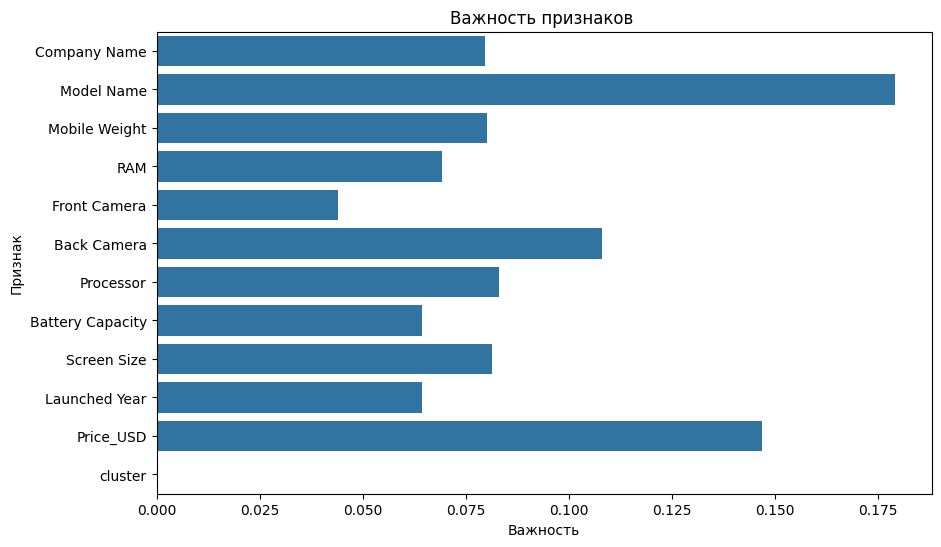

In [242]:
# получается, что не зря я удалял только нокиа)

# Для оценки важности признаков используем RandomForest для предсказания кластера
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

# Обучение модели
model = RandomForestClassifier()
model.fit(X_train, y_train)
features= df.columns

# Важность признаков
importances = rf.feature_importances_

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title('Важность признаков ')
plt.xlabel('Важность')
plt.ylabel('Признак')
plt.show()

In [ ]:
"""
Итого, в класстеризации лучшим оказался алгоритм KMeans. Оптимальное количество кластеров - 2, эфективно можно выделить до 6-и шт.
При выполнении кластеризации сразу был замечен отдельный класс, который очень сильно отличался от остальных.
Не сложными дейсвиями мы без детекции аномалий смогли выявить конкретную строку и удалить ее, а в дальнейшем мы еще и подтвердили верность своего решения поискав аномалии методом IsolationForest
Наиболее значимыми критериями при класстеризации мобильных телефонов является цена и модель и основной модуль камеры.
"""